In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
df = pd.read_csv('../datamining/datasets/breast-cancer.csv') # Ubah sesuai dengan lokasi relatif file breast-cancer.csv
df.head()

Grouping Age (years)           Education    Working status Marital status  \
0       BC       >= 50  Senior high school         Housewife       Marriage   
1   Non-BC       >= 50   Vocational degree  Master's student  Single/ widow   
2       BC       >= 50  Senior high school         Housewife       Marriage   
3   Non-BC       >= 50  Senior high school  Master's student       Marriage   
4       BC       >= 50  Senior high school   Private servant       Marriage   

  Menarche (years)   Menopause First pregnancy          Parity Breastfeeding  \
0        12  to 13  < 50 years     20-29 years  >= Multiparous   >=12 months   
1              >13  < 50 years       >30 years  >= Multiparous    <12 months   
2          7 to 11  < 50 years     20-29 years  >= Multiparous   >=12 months   
3        12  to 13  < 50 years     20-29 years     Primiparous   >=12 months   
4              >13  < 50 years     20-29 years  >= Multiparous   >=12 months   

  Highfat      BMI   Ethnicity  
0  Normal  Obesity  Minangnese  
1    High   Normal  Minangnese  
2  Normal   Normal    Javanese  
3    High   Normal    Javanese  
4    High   Normal  Minangnese

## Exploratory Data Analysis

### Plot Semua Fitur berdasarkan `Grouping`

In [260]:
def plot_group(data, columns, rows, cols):
	fig, axes = plt.subplots(rows, cols, figsize=(20, rows*5))
	axes = axes.flatten()

	for i, col in enumerate(columns):
		sns.countplot(data=data, x=col, hue='Grouping', ax=axes[i], palette='coolwarm')
		axes[i].set_title(f'Perbandingan {col} dengan Grouping', fontsize=15)
		axes[i].set_xlabel(col, fontsize=12)
		axes[i].set_ylabel('Jumlah', fontsize=12)
		axes[i].tick_params(labelrotation=45)

		for ax in axes[len(columns):]:
			ax.remove()
		plt.tight_layout()

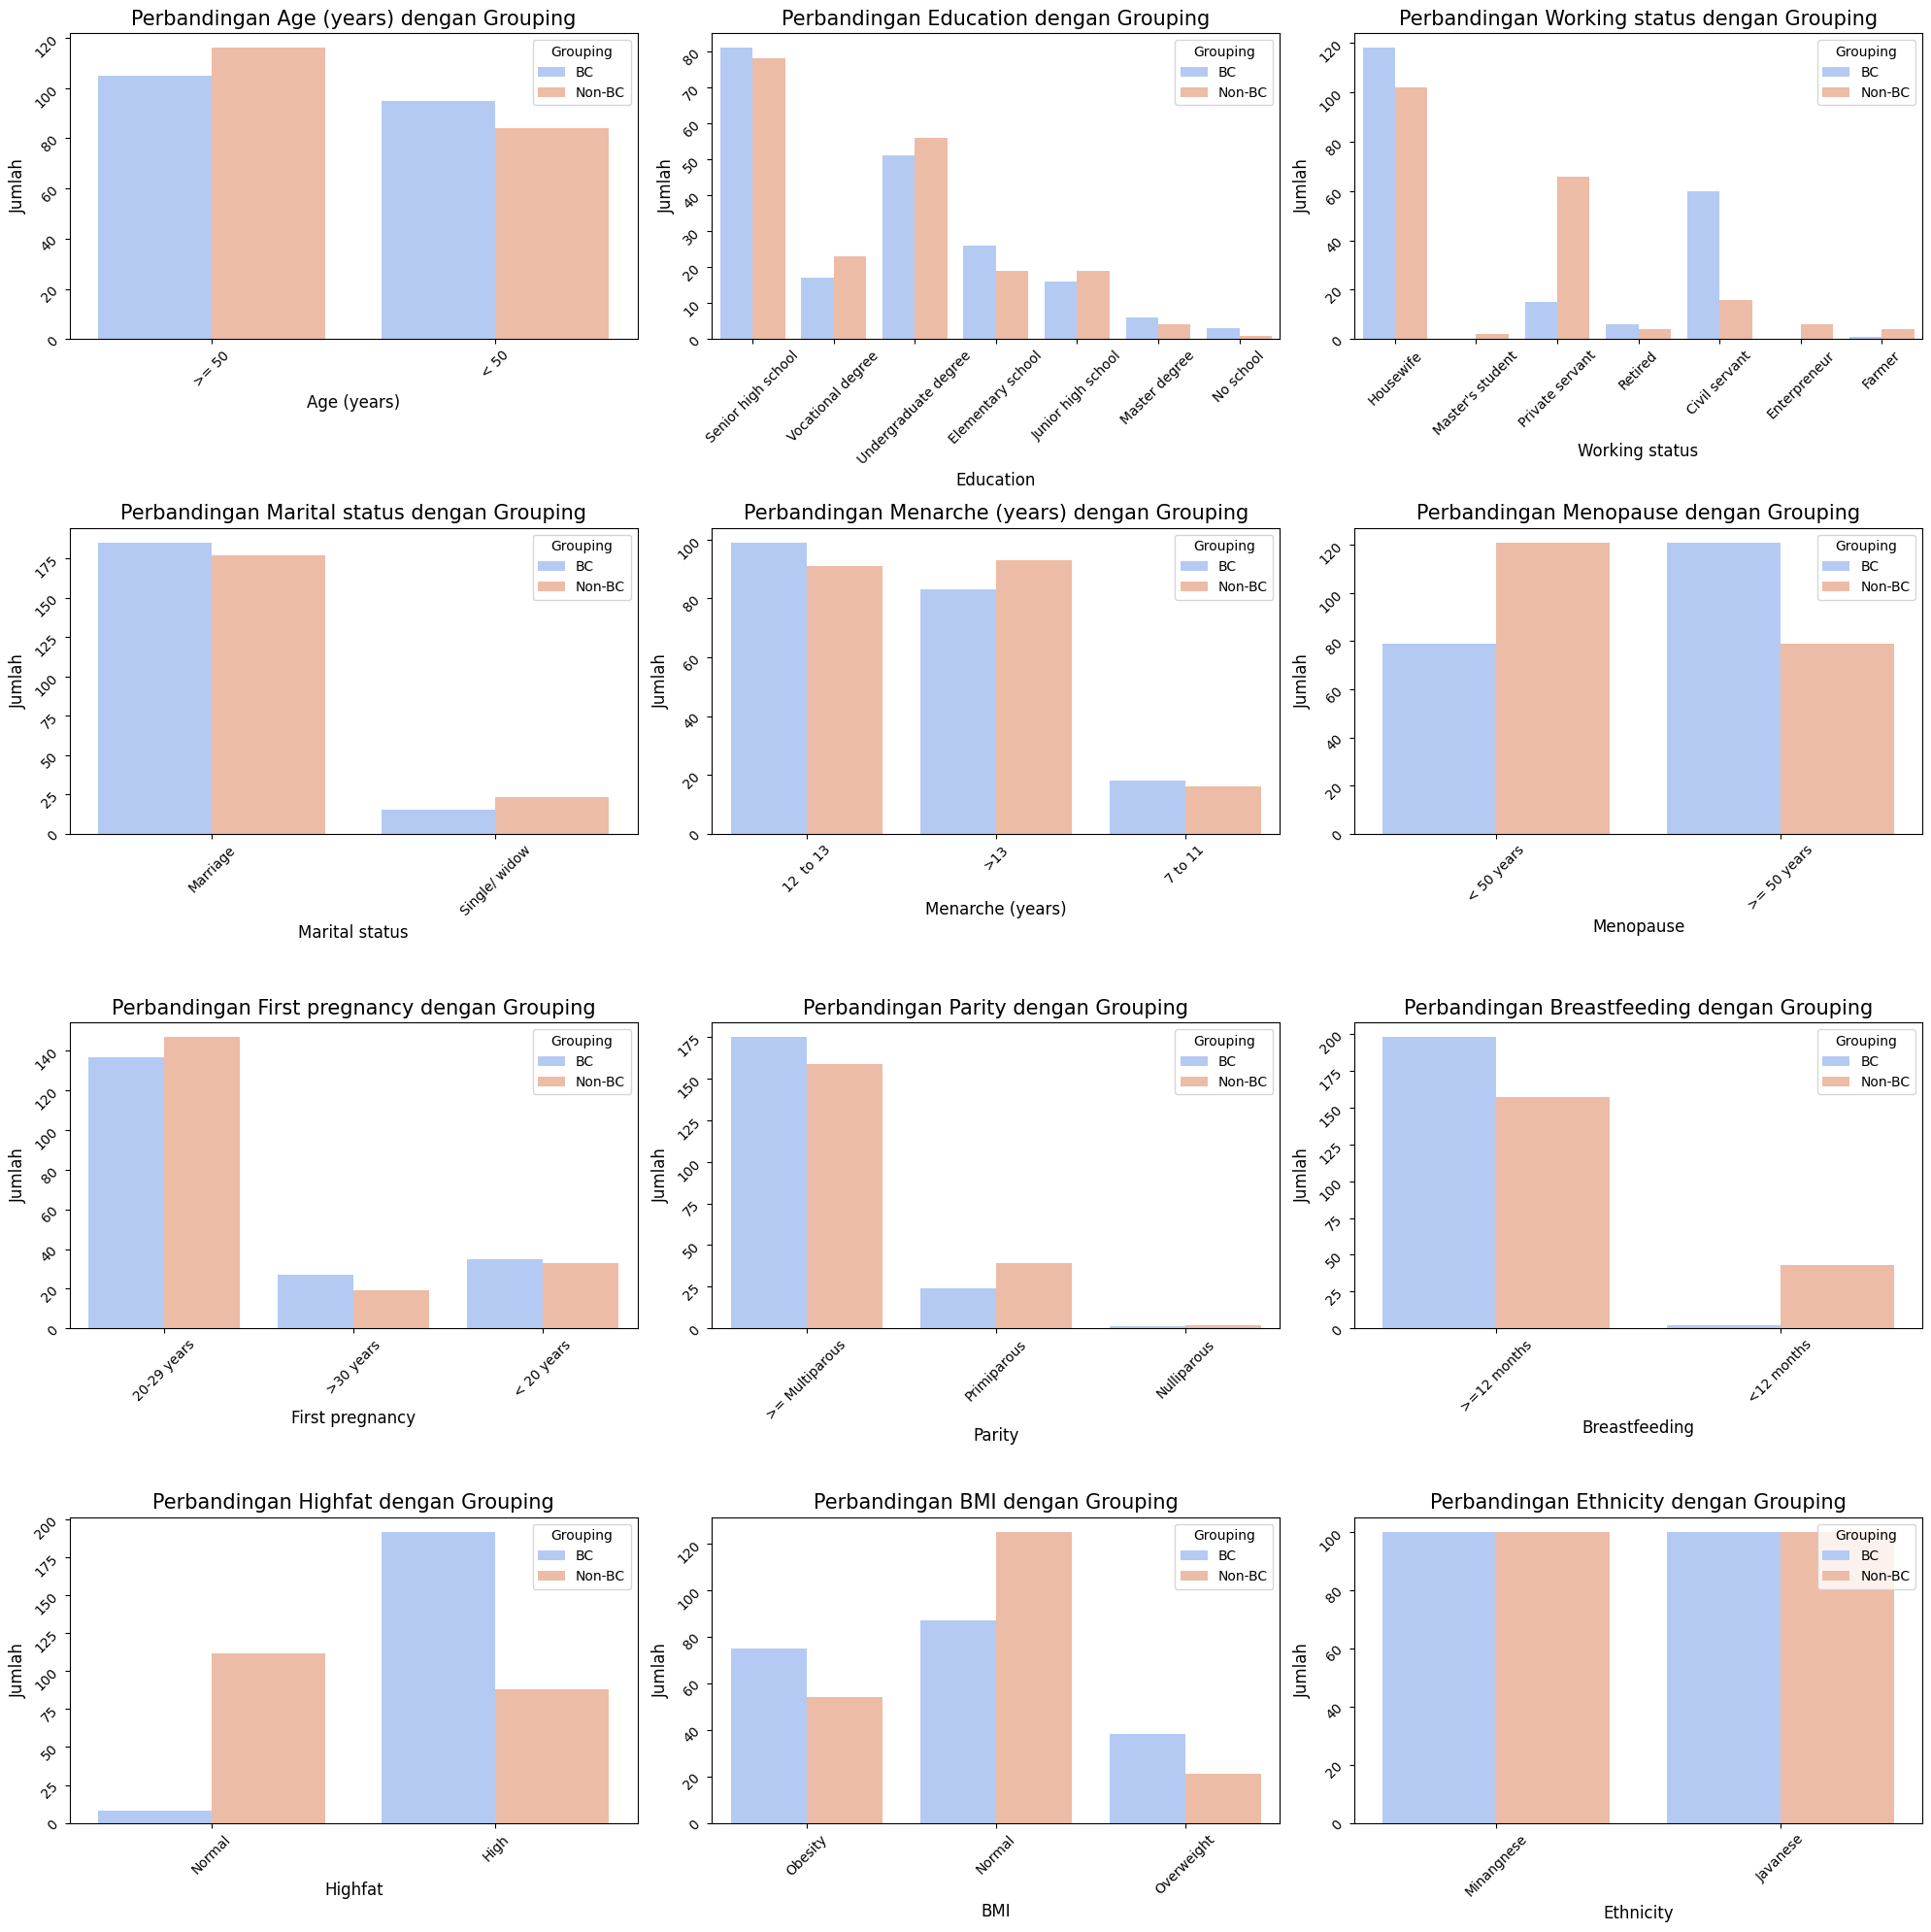

In [261]:
# Plot
plot_columns = df.columns.drop('Grouping')
plot_group(df, plot_columns, 4, 3)

## Feature Engineering

### 1. Feature Selection Using Chi-Square Test

The Chi-square test is a statistical test that's used to determine if there's a significant association between two categorical variables in a sample. It's based on the difference between the observed frequencies in each category of a cross-tabulation, and the frequencies that we would expect to get by chance alone.

The test calculates a statistic that follows a Chi-square distribution, which is where it gets its name. The degrees of freedom for the test are determined by the number of categories in each variable.

The null hypothesis for the test is that the variables are independent, and the alternative hypothesis is that they are not independent. If the p-value of the test is less than the chosen significance level (often 0.05), then we reject the null hypothesis and conclude that there is a significant association between the variables.

Here's how can get the p-value from Chi-Square Statistical Test in Python using the `sklearn` library:

```python
from sklearn.feature_selection import chi2

# Assume X_train is your train feature matrix and y_train are your train labels
chi2_stats, p_values = chi2(X_train, y_train)

# Get the P-value in series type
p_value_series = pd.Series(p_values, index=X_train.columns)

# Print the P-value in each feature
for i, val in enumerate(p_value_series):
    print(f'Feature {p_value_series.index[i]} : {val}')
```

### 2. Feature Selection Using Feature Importance (Random Forest)

Feature importance in a Random Forest model refers to the average contribution of each feature in improving the predictions made by the model. It's a measure of how much the model's predictions depend on each feature.

Random Forest calculates feature importance based on the decrease in node impurity, which is weighted by the probability of reaching that node (which is approximated by the number of samples that reach the node). The higher the value, the more important the feature.

In other words, a feature has a high importance if it significantly improves the predictive accuracy of the model, and a low importance if it doesn't contribute much to the model's accuracy, or even decreases it.

Here's how you can get feature importance from a Random Forest model in Python using the `sklearn` library:

```python
from sklearn.ensemble import RandomForestClassifier

# Assume X is your feature matrix and y are your labels
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')
```

## FEATURE SELECTION (Chi Square Method)

In [262]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Check NaN Values and Remove them

In [263]:
df = pd.read_csv('datasets/breast-cancer.csv')
df.isna().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     2
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

In [264]:
df['First pregnancy'].fillna(value='NaN')
df = df.dropna()
df.isna().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     0
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

#### Check amount of unique values in column

In [265]:
df.nunique()

Grouping            2
Age (years)         2
Education           7
Working status      7
Marital status      2
Menarche (years)    3
Menopause           2
First pregnancy     3
Parity              3
Breastfeeding       2
Highfat             2
BMI                 3
Ethnicity           2
dtype: int64

#### LabelEncoder

In [266]:
label_encoder = LabelEncoder()

for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

Grouping  Age (years)  Education  Working status  Marital status  \
0         0            1          4               3               0   
1         1            1          6               4               1   
2         0            1          4               3               0   
3         1            1          4               4               0   
4         0            1          4               5               0   

   Menarche (years)  Menopause  First pregnancy  Parity  Breastfeeding  \
0                 0          0                0       0              1   
1                 2          0                2       0              0   
2                 1          0                0       0              1   
3                 0          0                0       2              1   
4                 2          0                0       0              1   

   Highfat  BMI  Ethnicity  
0        1    1          1  
1        0    0          1  
2        1    0          0  
3        0    0          0  
4        0    0          1

In [267]:
X = df.drop('Grouping', axis=1)
y = df['Grouping']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Chi-square Method

In [268]:
# Train with Chi Square Method
chi2_stats, p_values = chi2(X_train, y_train)

# P-values series features
p_value_series = pd.Series(p_values, index=X_train.columns).sort_values(ascending=True)

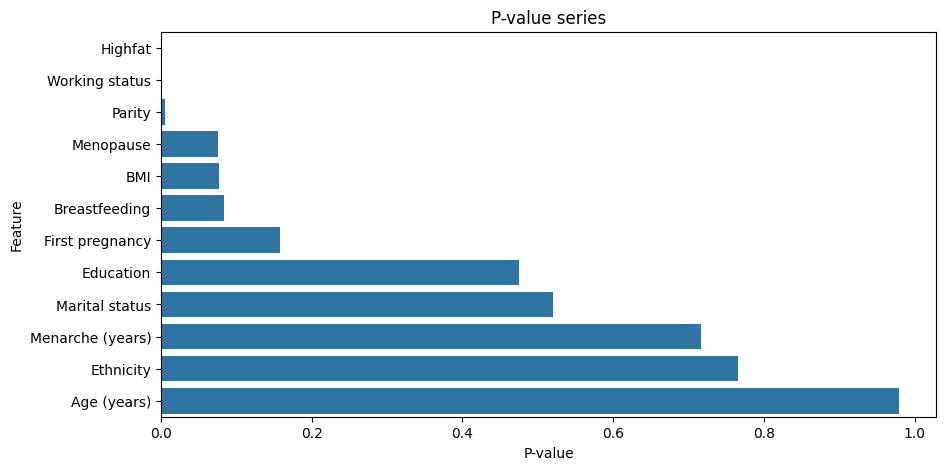

In [269]:
# Plot all features with p-values
plt.figure(figsize=(10,5))
sns.barplot(x=p_value_series.values, y=p_value_series.index)
plt.xlabel('P-value')
plt.ylabel('Feature')
plt.title('P-value series')
plt.show()

A lower p-value indicates that the feature is statistically significant in relation to the target variable, with a small p-value often implying a strong association.

## Feature Importance (Random Forest)

In [270]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Grouping  Age (years)  Education  Working status  Marital status  \
0         0            1          4               3               0   
1         1            1          6               4               1   
2         0            1          4               3               0   
3         1            1          4               4               0   
4         0            1          4               5               0   

   Menarche (years)  Menopause  First pregnancy  Parity  Breastfeeding  \
0                 0          0                0       0              1   
1                 2          0                2       0              0   
2                 1          0                0       0              1   
3                 0          0                0       2              1   
4                 2          0                0       0              1   

   Highfat  BMI  Ethnicity  
0        1    1          1  
1        0    0          1  
2        1    0          0  
3        0  

### Feature Selection using Random Forest

In [271]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Split data into features and target
X = df.drop('Grouping', axis=1)
y = df['Grouping']

# Train classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and get indices of top 6 features
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 5
top_features = sorted_indices[:top_n]

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.040167579805736
Feature 1: 0.11125067139159839
Feature 2: 0.16155524341556218
Feature 3: 0.025697111142665326
Feature 4: 0.06802186029258055
Feature 5: 0.045142497176954476
Feature 6: 0.05326357389337504
Feature 7: 0.028590546998825
Feature 8: 0.05994915646694781
Feature 9: 0.29515606349666534
Feature 10: 0.0660261892471078
Feature 11: 0.04517950667198226


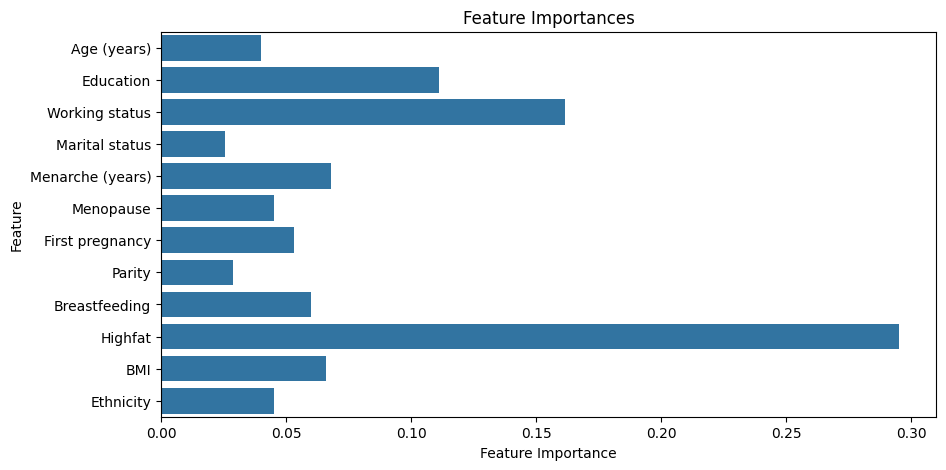

In [272]:
# Plot all features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=df.columns.drop('Grouping'))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

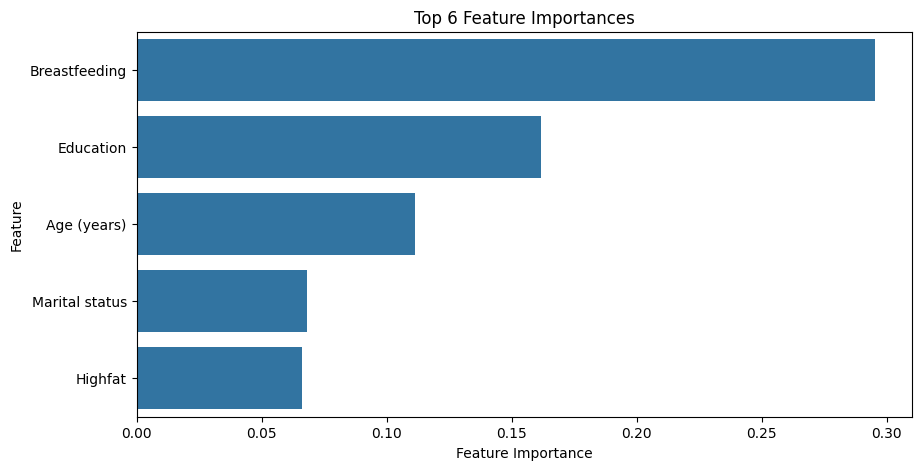

In [273]:
# Plot top 5 features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[top_features], y=df.columns[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 6 Feature Importances')
plt.show()

In [274]:
# Define feature_names
feature_names = df.drop('Grouping', axis=1).columns

# Print the top 6 features
top_feature_names = [feature_names[i] for i in top_features]
print(f"Top {top_n} features:")
for name, importance in zip(top_feature_names, feature_importances[top_features]):
    print(f"{name}: {importance}")

Top 5 features:
Highfat: 0.29515606349666534
Working status: 0.16155524341556218
Education: 0.11125067139159839
Menarche (years): 0.06802186029258055
BMI: 0.0660261892471078


### Feature Selection Using Gradient Boosting Tree

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and get indices of top 6 features
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 5
top_features = sorted_indices[:top_n]

# Print feature importances
for i, importance in enumerate(feature_importances):
	print(f"Feature {i}: {importance}")

# Print the top 6 features
top_feature_names = [feature_names[i] for i in top_features]
print(f"Top {top_n} features:")

for name, importance in zip(top_feature_names, feature_importances[top_features]):
	print(f"{name}: {importance}")

Feature 0: 0.03320845068412476
Feature 1: 0.04509544699906614
Feature 2: 0.14010028145584416
Feature 3: 0.015963513066521204
Feature 4: 0.011880273680938608
Feature 5: 0.040366623295201506
Feature 6: 0.050181251969683455
Feature 7: 0.011932892451444863
Feature 8: 0.09090109959190149
Feature 9: 0.5017032118295998
Feature 10: 0.03692753718291189
Feature 11: 0.021739417792761843
Top 5 features:
Highfat: 0.5017032118295998
Working status: 0.14010028145584416
Breastfeeding: 0.09090109959190149
First pregnancy: 0.050181251969683455
Education: 0.04509544699906614


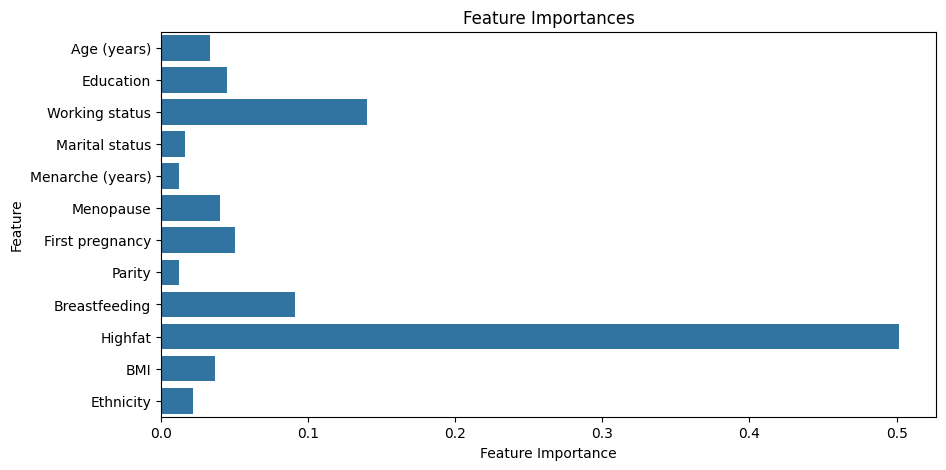

In [276]:
# Plot all features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=df.columns.drop('Grouping'))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

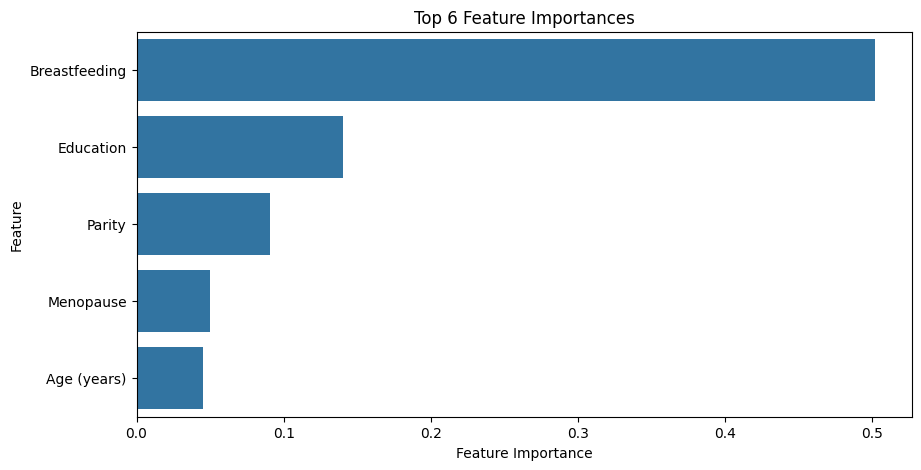

In [277]:
# Plot Top 5 features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[top_features], y=df.columns[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 6 Feature Importances')
plt.show()

### Classification with Random Forest Using Top 6 Features


In [278]:
# Separate features and target
X = df[top_feature_names].values
y = df['Grouping'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy with selected features: {accuracy}")

Accuracy with selected features: 0.8625


### Measure Results using Classification Report

In [279]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Generate predictions for the test set
y_pred = clf.predict(X_test)

# Calculate the classification report
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[28  3]
 [ 8 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.93      0.84      0.88        49

    accuracy                           0.86        80
   macro avg       0.85      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80


Accuracy Score:
0.8625
